In [2]:
import pandas as pd
import numpy as np
from preprocessing import preprocess_data
from sklearn.preprocessing import LabelEncoder
from notebooks_classification.classification import compute_classifier
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier

## Data importation

In [3]:
df = pd.read_csv('../data/Spotify_train_dataset.csv')

features_columns = ['danceability', 'energy', 'key', 'loudness', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'time_signature']
label = ['genre']

## Preprocess

### Without Strandardization

In [4]:
df_normal, labels = preprocess_data(df, features_columns, label, z_score=False, standardize=False)

#Encode data
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

------------------------------------------
            Preprocessing data            
------------------------------------------
Get dataset
Shape of the data to process : (31728, 20)
------------------------------------------
Extract labels ...
Extract inputs ...
------------------------------------------
Data shape after preprocessing : (31728, 13)
Labels shape : (31728,)
Return dataset(s) ...
Preprocessing finished
------------------------------------------


### With Strandardization

In [5]:
df_stand, labels = preprocess_data(df, features_columns, label, z_score=False, standardize=True)

#Encode data
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

------------------------------------------
            Preprocessing data            
------------------------------------------
Get dataset
Shape of the data to process : (31728, 20)
------------------------------------------
Extract labels ...
Extract inputs ...
Center and reduce inputs ...
------------------------------------------
Data shape after preprocessing : (31728, 13)
Labels shape : (31728,)
Return dataset(s) ...
Preprocessing finished
------------------------------------------


### Basic Model

In [ ]:
print("SGD classifier basic param")
SGD = SGDClassifier()
print("Without Standardization : ")
y_pred_normal = compute_classifier(df_normal, labels_encoded, SGD)
print("\nWith Standardization : ")
y_pred_stand = compute_classifier(df_stand, labels_encoded, SGD)
print(classification_report(labels_encoded, y_pred_stand, target_names=le.classes_))

SGD classifier basic param
Without Standardization : 


### parameters

In [7]:
print("SGD classifier max_iter param")
SGD = SGDClassifier(max_iter=1000, tol=1e-3)
y_pred_stand = compute_classifier(df_stand, labels_encoded, SGD)

SGD classifier max_iter param
Accuracy : 0.49407463439233484


In [7]:
print("SGD classifier best 'loss' param")
SGD = SGDClassifier(loss='log', max_iter=1000, tol=1e-3)
y_pred_stand = compute_classifier(df_stand, labels_encoded, SGD)
print(classification_report(labels_encoded, y_pred_stand, target_names=le.classes_))

SGD classifier best 'loss' param
Accuracy : 0.5509959657085225
                 precision    recall  f1-score   support

      Dark Trap       0.44      0.38      0.41      3378
            Emo       0.40      0.36      0.38      1262
         Hiphop       0.39      0.35      0.37      2255
            Pop       0.00      0.00      0.00       336
            Rap       0.39      0.28      0.32      1420
            RnB       0.35      0.19      0.25      1605
     Trap Metal       0.42      0.17      0.24      1474
Underground Rap       0.42      0.60      0.50      4378
            dnb       0.70      0.81      0.75      2213
      hardstyle       0.57      0.58      0.58      2178
      psytrance       0.79      0.81      0.80      2214
      techhouse       0.70      0.79      0.74      2254
         techno       0.77      0.76      0.77      2226
         trance       0.60      0.63      0.61      2275
           trap       0.61      0.71      0.66      2260

       accuracy        

In [ ]:
# print("SGD classifier leaning rate type implication")
# learning_rates = ["constant", "optimal", "invscaling", "adaptive"]
# for lr in learning_rates :
#     SGD = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, learning_rate=lr, eta0=0.1)
#     print('\nlearning rate ' + lr + ':')
#     y_pred_stand = compute_classifier(df_stand, labels_encoded, SGD)

In [12]:
# print("SGD classifier eta0 implication for learning rate 'adaptive")
# eta0_list = np.random.uniform(0.01, 1, 10)
# for eta0 in eta0_list:
#     SGD = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, learning_rate='adaptive', eta0=eta0)
#     print('\nEta0 = ' + str(eta0) + ':')
#     y_pred_stand = compute_classifier(df_stand, labels_encoded, SGD)

SGD classifier eta0 implication for learning rate 'adaptive

Eta0 = 0.5976112892330638:
Accuracy : 0.5649268784669692

Eta0 = 0.7573819828779228:
Accuracy : 0.5646116994452849

Eta0 = 0.09444475672971928:
Accuracy : 0.5647377710539586

Eta0 = 0.7574105838480979:
Accuracy : 0.5645801815431165

Eta0 = 0.6546483502329741:
Accuracy : 0.5646432173474534

Eta0 = 0.6015926001724772:
Accuracy : 0.5647377710539586

Eta0 = 0.8346498873858275:
Accuracy : 0.5644856278366112

Eta0 = 0.9852422670098709:
Accuracy : 0.5648638426626323

Eta0 = 0.7089183943209227:
Accuracy : 0.5645801815431165

Eta0 = 0.024462340938316028:
Accuracy : 0.5643595562279374


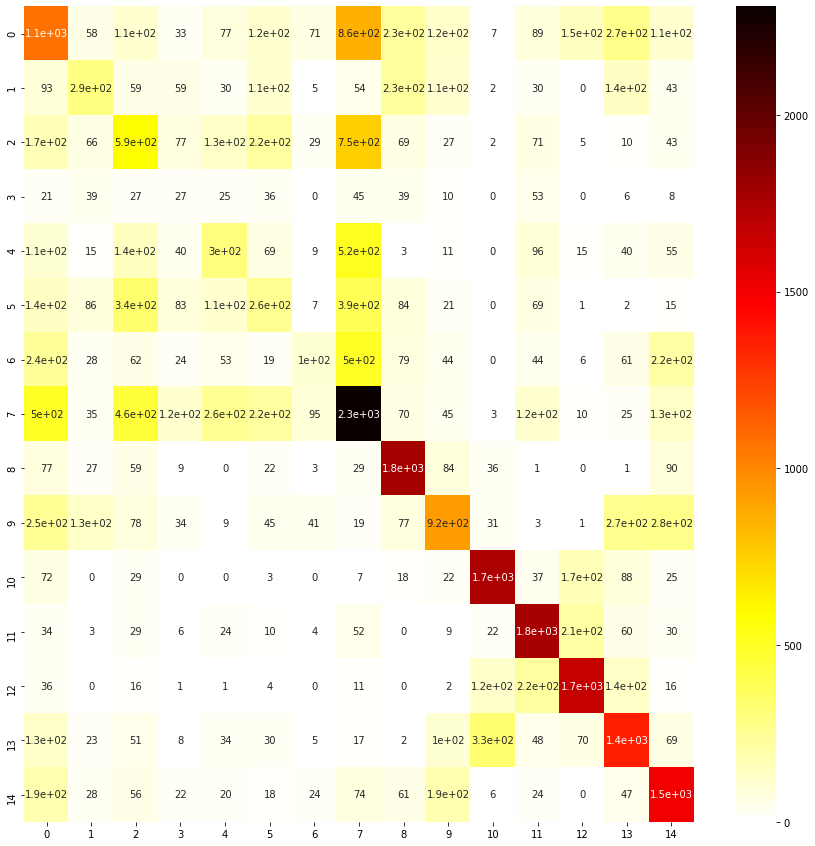

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cf_matrix = confusion_matrix(labels_encoded, y_pred_stand)

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(cf_matrix, annot=True, ax=ax, cmap='hot_r')
plt.show()
